In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
df = pd.read_csv('Churn_Modelling.csv')

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [35]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [36]:
df = pd.get_dummies(df,columns=['Geography','Gender'],  dtype='int',drop_first=True)

In [37]:
df["Geography_Germany"] = df["Geography_Germany"].astype(int)
df["Geography_Spain"] = df["Geography_Spain"].astype(int)
df["Gender_Male"] = df["Gender_Male"].astype(int)

In [38]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [39]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
X.shape

(10000, 11)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 36        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7969

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy:

In [75]:
y_log = model.predict(X_test)

63/63 [==============================] - 0s 924us/step


In [76]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [77]:
# y_pred = y_pred.argmax(axis=-1)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

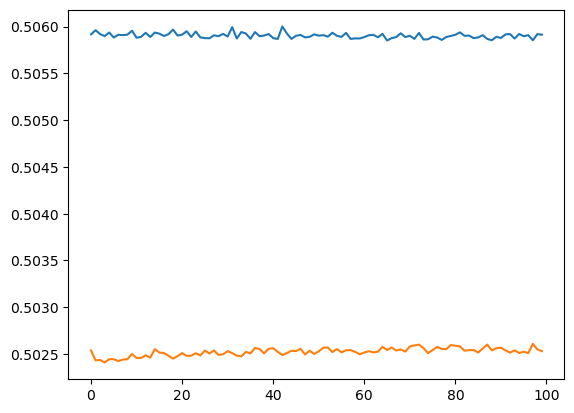

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

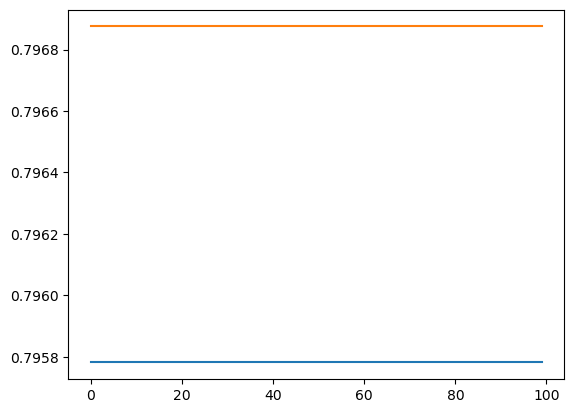

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])